## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [95]:
import numpy as np

In [96]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 pixels

In [97]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [98]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [99]:
digits.data.shape

(1797, 64)

In [100]:
digits.target.shape

(1797,)

In [101]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [102]:
import pandas as pd
df = pd.DataFrame(data=digits['data'])
df = pd.concat([df,pd.DataFrame(digits['target'],columns=['target'])],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


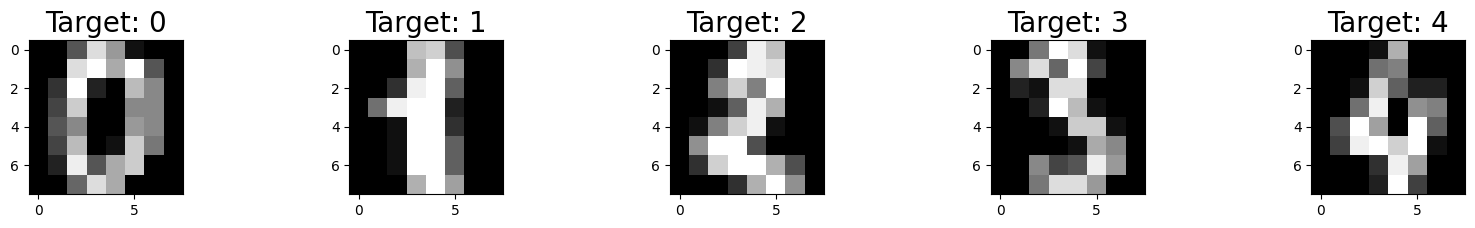

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))

for index, image in enumerate(digits.data[0:5]):
    plt.subplot(1,5,index+1)
    label = digits.target[index]
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Target: '+ str(label), fontsize=20)
        

In [104]:
digits.data[3].reshape(8,8)

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

### Train-test split

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [106]:
X_train.shape

(1347, 64)

In [107]:
X_test.shape

(450, 64)

In [108]:
# Comprobamos si las clases están balanceadas

pd.Series(y_train).value_counts(normalize=True)

4    0.106162
0    0.104677
1    0.103192
3    0.102450
5    0.099480
2    0.098738
9    0.098738
7    0.097253
6    0.095768
8    0.093541
dtype: float64

### Model training

In [109]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)

logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Predict

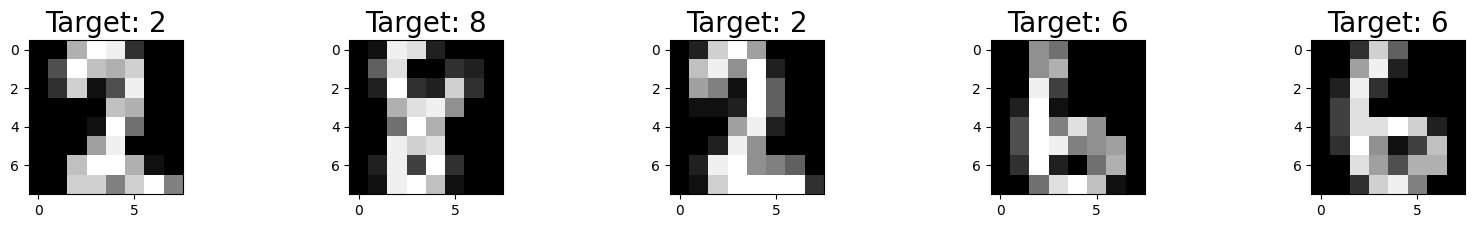

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))

for index, image in enumerate(X_test[0:5]):
    plt.subplot(1,5,index+1)
    label = y_test[index]
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Target: '+ str(label), fontsize=20)
        

In [111]:
logisticRegr.predict(X_test[0].reshape(1, -1))

array([2])

In [112]:
fallos = []
for idx in range(X_test.shape[0]):
    real = y_test[idx]
    pred = int(logisticRegr.predict(X_test[idx].reshape(1,-1)))
    if real != pred: fallos.append(idx)

In [113]:
len(fallos) # Número de fallos en test

21

Text(0.5, 1.0, 'Real: 5 Pred: 9')

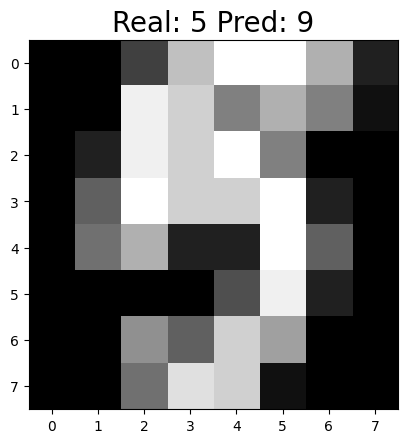

In [114]:
ejemplo = fallos[0]
plt.imshow(np.reshape(X_test[ejemplo], (8,8)), cmap=plt.cm.gray);
plt.title('Real: '+ str(y_test[ejemplo]) + ' Pred: ' + str(int(logisticRegr.predict(X_test[ejemplo].reshape(1,-1))))
          , fontsize=20)

### Probabilities

In [115]:
logisticRegr.predict_proba(X_test[ejemplo].reshape(1,-1))

# Probabilidad al 9 del 0.96
# Probabilidad al 5 del 0.04

array([[4.17632317e-07, 1.29055978e-06, 1.52747228e-14, 1.04974855e-07,
        6.97462722e-10, 3.87149906e-02, 1.44087925e-10, 1.28685400e-08,
        1.33609322e-08, 9.61283169e-01]])

In [116]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Model Performance

In [117]:
score = logisticRegr.score(X_test, y_test)
print('Acierta un ',round(score*100,2),'%', sep='')

Acierta un 95.33%


In [118]:
# Matriz de confusión

import sklearn.metrics as metrics

predictions = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm
# Eje horizontal: falsos positivos
# Eje vertical: falsos negativos

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 41,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  1,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 44]], dtype=int64)

In [119]:
pd.Series(y_test).value_counts()

6    52
8    48
7    48
5    48
9    47
3    45
2    44
1    43
4    38
0    37
dtype: int64

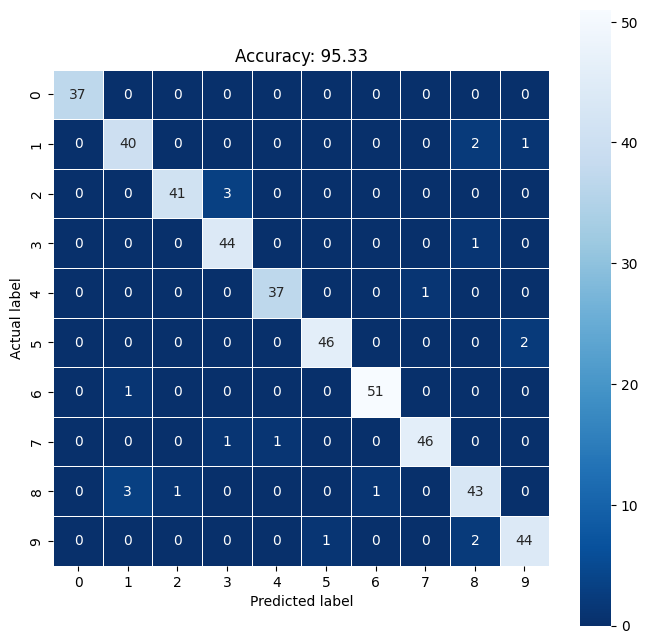

In [120]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=0.5,square=True,
           cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy: '+str(round(score*100,2)));

In [121]:
precision7 = 46/47
recall7 = 46/48

precision7,recall7

(0.9787234042553191, 0.9583333333333334)

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [123]:
nueva_imagen = np.array([ 0.,  0., 16., 0., 15.,  3.,  0.,  0.,  0.,  5., 4., 0., 11.,
       13.,  0.,  0.,  0.,  3., 5.,  1.,  5., 1.,  0.,  0.,  0.,  0.,
        0.,  0., 12., 9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
       16., 11.,  1.,  0.,  0.,  0., 0., 13.,  8., 13., 16.,  8.])

In [124]:
logisticRegr.predict(nueva_imagen.reshape(1,-1))

array([2])

### Save the model

In [125]:
logisticRegr

LogisticRegression(max_iter=10000)

In [126]:
import pickle

with open('finished_model.model','wb') as file:
    pickle.dump(logisticRegr, file)

### Stop the Kernel

### Load the model

In [1]:
import numpy as np
import pickle

In [2]:
nueva_imagen = np.array([ 0.,  0., 16., 0., 15.,  3.,  0.,  0.,  0.,  5., 4., 0., 11.,
       13.,  0.,  0.,  0.,  3., 5.,  1.,  5., 1.,  0.,  0.,  0.,  0.,
        0.,  0., 12., 9.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
        0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
       16., 11.,  1.,  0.,  0.,  0., 0., 13.,  8., 13., 16.,  8.])

In [3]:
# leer el modelo
with open('finished_model.model', 'rb') as file:
    logisticRegr = pickle.load(file)

In [4]:
logisticRegr.predict(nueva_imagen.reshape(1,-1))

array([2])